# Анализ продаж британского e-commerce магазина TATA (поиск инсайтов, составление рекомендаций стейкхолдерам).

In [60]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

In [61]:
df = pd.read_csv('Online Retail Data Set.csv', encoding='unicode_escape')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


В датасете имеются 8 столбцов: <br> 
InvoiceNo - номер счета <br> 
StockCode - код акции <br> 
Description - описание товаров в счете <br> 
Quantity - количество товаров в счете <br> 
InvoiceDate - дата счета <br> 
UnitPrice - общая сумма по счету <br> 
CustomerID - идентификатор клиента <br> 
Country - страна <br> 
Всего 541909 записей. Пропущено 535,874 значений.

In [66]:
# Преобразование столбца InvoiceDate в формат даты
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format="%d-%m-%Y %H:%M")
# Добавление столбцов "Year" и "Month"
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month
# Добавление столбца с месяцем и годом
df['YearMonth'] = df['InvoiceDate'].dt.to_period('M')
# Создание дополнительного столбца с суммой покупки
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

## Расчет динамики продаж по месяцам

In [67]:
# Группировка данных по месяцам и годам и подсчет общей суммы покупок
monthly_sales = df.groupby(['Year', 'Month'])['TotalPrice'].sum().reset_index()

print(monthly_sales)

    Year  Month   TotalPrice
0   2010     12   748957.020
1   2011      1   560000.260
2   2011      2   498062.650
3   2011      3   683267.080
4   2011      4   493207.121
5   2011      5   723333.510
6   2011      6   691123.120
7   2011      7   681300.111
8   2011      8   682680.510
9   2011      9  1019687.622
10  2011     10  1070704.670
11  2011     11  1461756.250
12  2011     12   433668.010


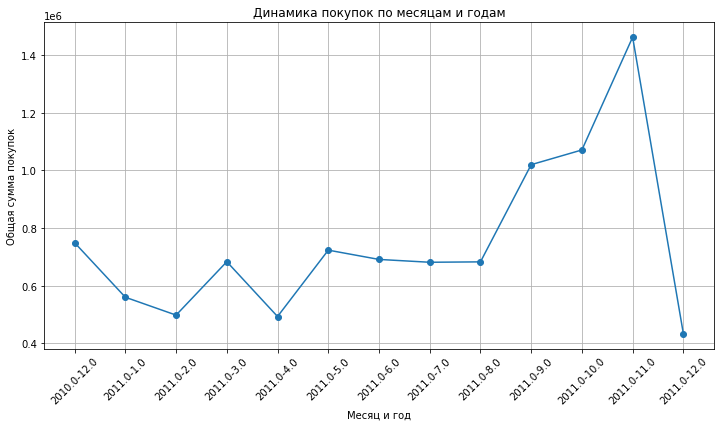

In [68]:
# Создание графика
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index, monthly_sales['TotalPrice'], marker='o')
plt.xticks(range(len(monthly_sales)), [f"{row['Year']}-{row['Month']}" for index, row in monthly_sales.iterrows()], rotation=45)
plt.xlabel('Месяц и год')
plt.ylabel('Общая сумма покупок')
plt.title('Динамика покупок по месяцам и годам')
plt.grid(True)
plt.show()

Мы построили график динамики покупок за период с декабря 2010 года по декабрь 2012 года. Мы наблюдаем пиковые значения продаж в следующие периоды времени: декабрь 10 года, июнь и декабрь 11 года. Падение продаж было в феврале, апреле и августе 11 года, что обусловлено сезонными факторами, связанными с товарными категориями.

## Суммы покупок по каждой стране за все время (в порядке убывания):

In [79]:
# Создание таблицы продаж по стране покупателя
sales_by_country = df.groupby('Country').sum()['TotalPrice'].sort_values(ascending=False)

print(sales_by_country)

Country
United Kingdom          8187806.364
Netherlands              284661.540
EIRE                     263276.820
Germany                  221698.210
France                   197403.900
Australia                137077.270
Switzerland               56385.350
Spain                     54774.580
Belgium                   40910.960
Sweden                    36595.910
Japan                     35340.620
Norway                    35163.460
Portugal                  29367.020
Finland                   22326.740
Channel Islands           20086.290
Denmark                   18768.140
Italy                     16890.510
Cyprus                    12946.290
Austria                   10154.320
Hong Kong                 10117.040
Singapore                  9120.390
Israel                     7907.820
Poland                     7213.140
Unspecified                4749.790
Greece                     4710.520
Iceland                    4310.000
Canada                     3666.380
Malta               

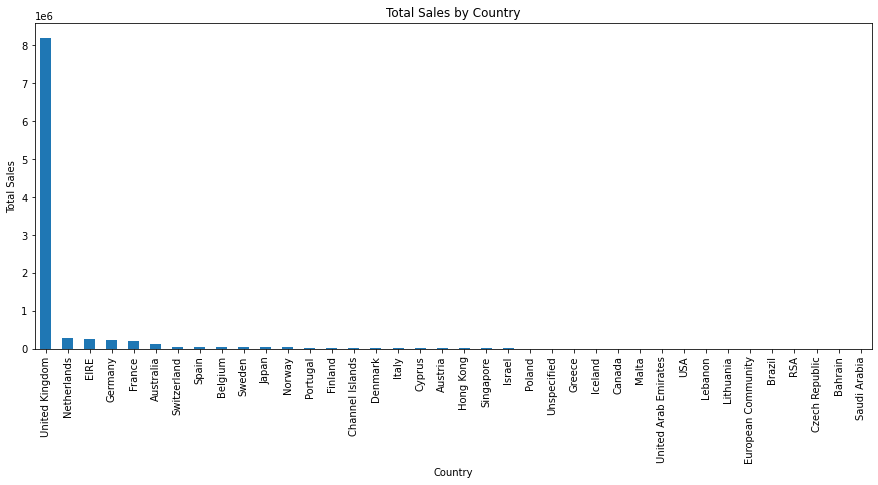

In [80]:
# Создание графика
sales_by_country.plot(kind="bar", figsize=(15, 6))
plt.title("Total Sales by Country")
plt.ylabel("Total Sales")
plt.show()

Топ-продаж делают европейские страны (особенно Великобритания), а также некоторые азиатские страны: Гонконг, Сингапур. 

## Cуммы покупок по каждой стране за каждый месяц года отдельно:

In [95]:
# Создание таблицы продаж по стране покупателя по месяцам и годам
sales_by_country_month_year = df.groupby(['Country', df['InvoiceDate'].dt.to_period('M')]).sum()['TotalPrice'].sort_values(ascending=False)

print(sales_by_country_month_year)

Country         InvoiceDate
United Kingdom  2011-11        1282805.780
                2011-10         877438.190
                2011-09         862018.152
                2010-12         676742.620
                2011-05         596459.860
                                  ...     
Cyprus          2011-12            -91.250
Japan           2011-01           -109.800
                2011-12           -116.930
Bahrain         2011-01           -205.740
Israel          2010-12           -227.440
Name: TotalPrice, Length: 314, dtype: float64


In [89]:
# Группировка данных по странам и месяцам и суммирование продаж
sales_by_country_month = df.groupby(["Country", "Month"])["TotalPrice"].sum().unstack()

print(sales_by_country_month)

Month                        1          2          3           4          5   \
Country                                                                        
Australia               9017.71   14627.47   17055.29     333.400   13628.51   
Austria                     NaN     518.36    1708.12     680.780    1249.43   
Bahrain                 -205.74        NaN        NaN         NaN     548.40   
Belgium                 1154.05    2161.32    3333.58    1954.150    2727.00   
Brazil                      NaN        NaN        NaN    1143.600        NaN   
Canada                      NaN        NaN     140.54         NaN     534.24   
Channel Islands          645.08    1784.71    3509.33     293.000     903.79   
Cyprus                   547.50    4013.55     938.39     -35.800        NaN   
Czech Republic              NaN     549.26        NaN     -57.510        NaN   
Denmark                     NaN     399.22    3978.99         NaN     515.70   
EIRE                   21656.52    9674.

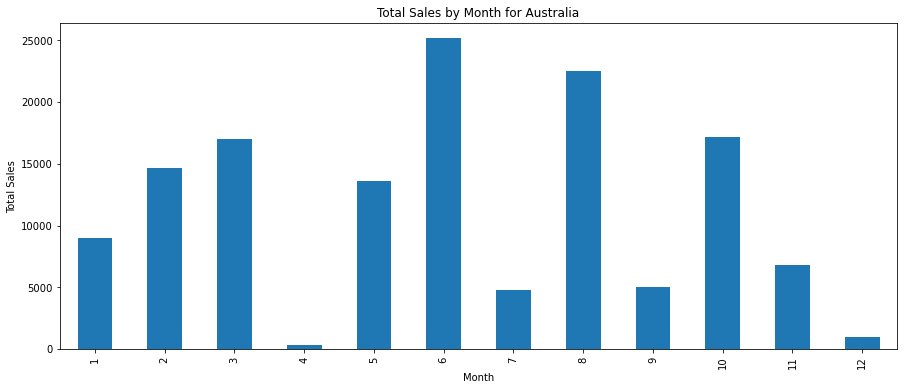

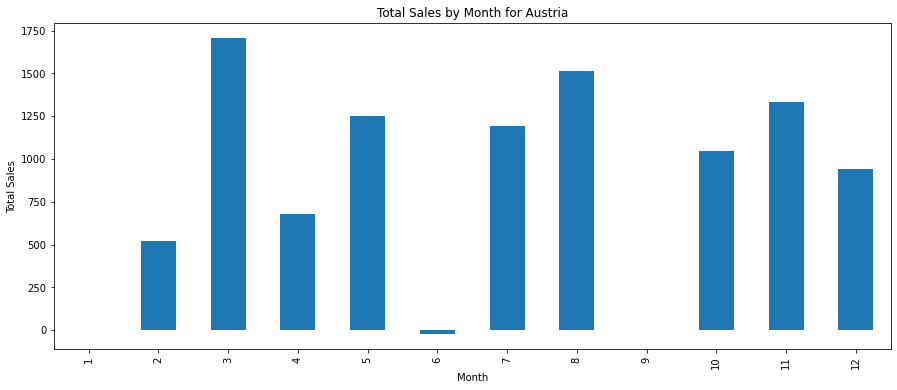

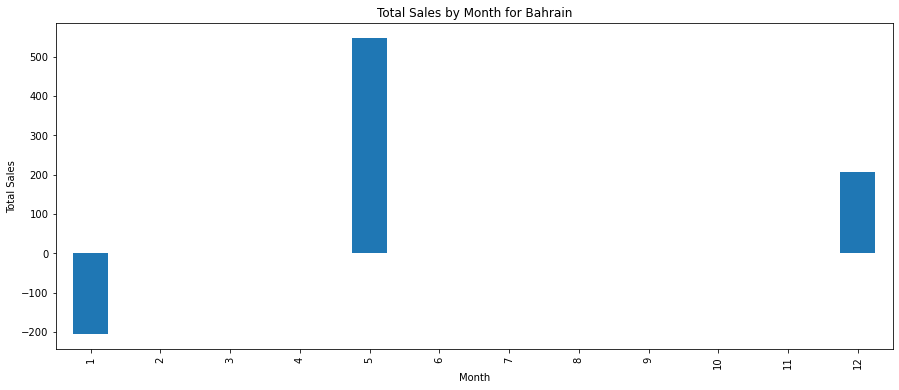

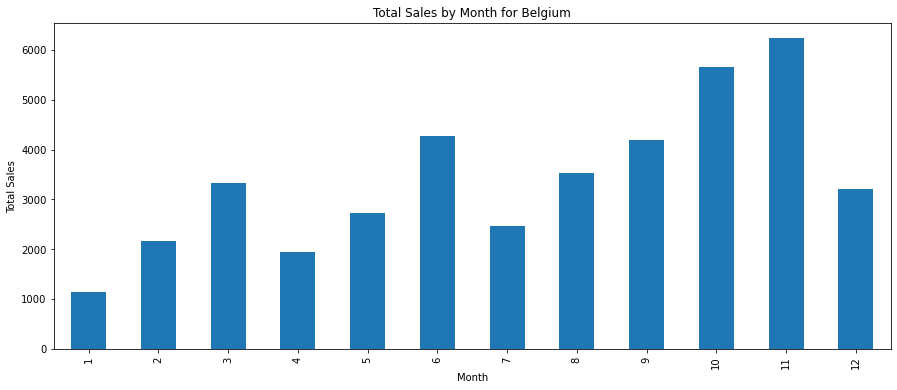

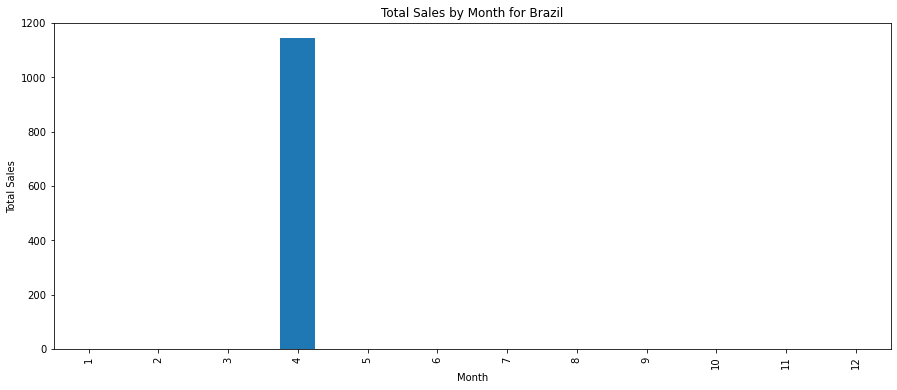

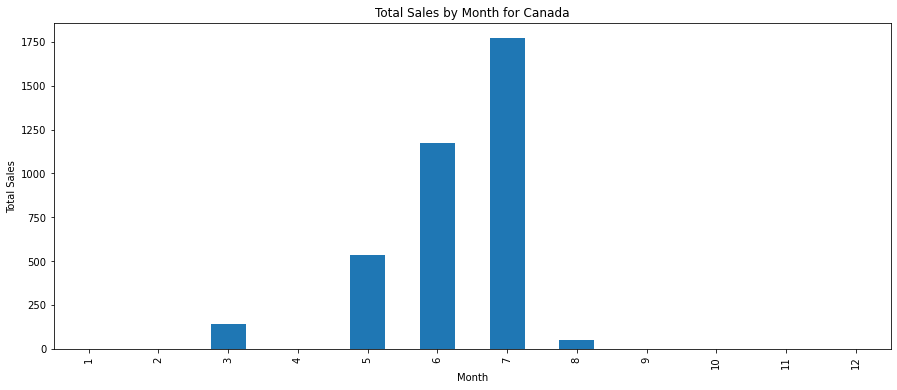

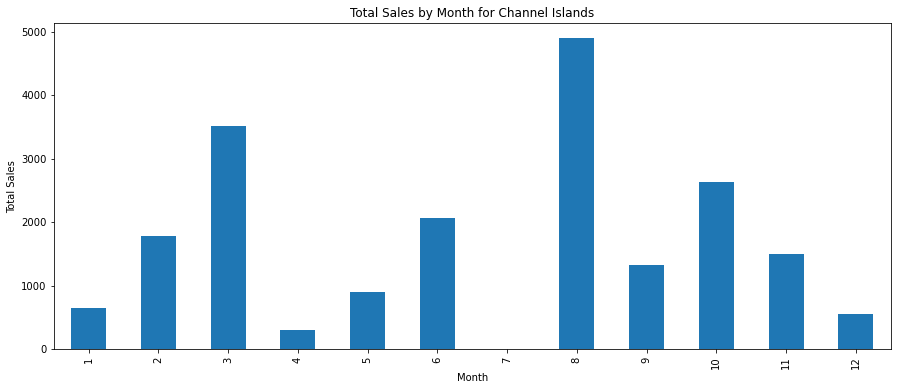

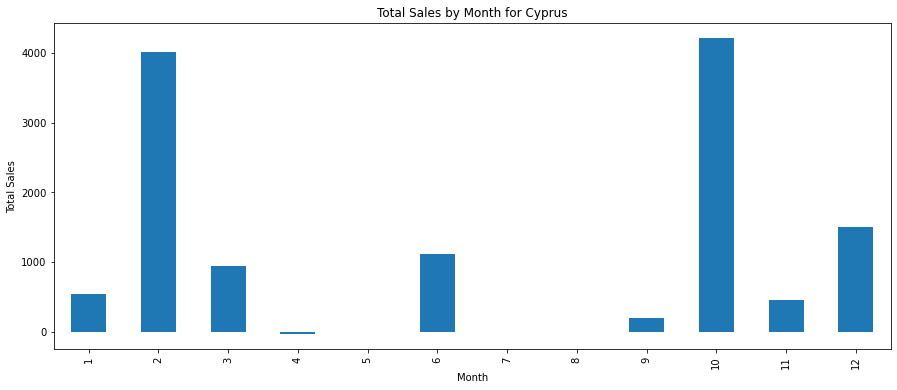

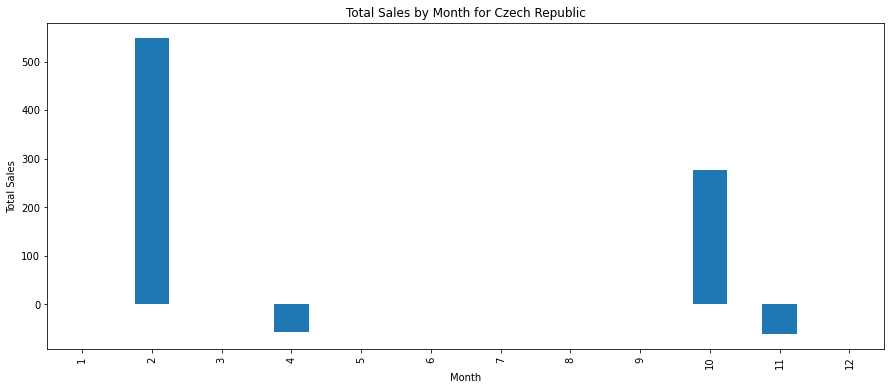

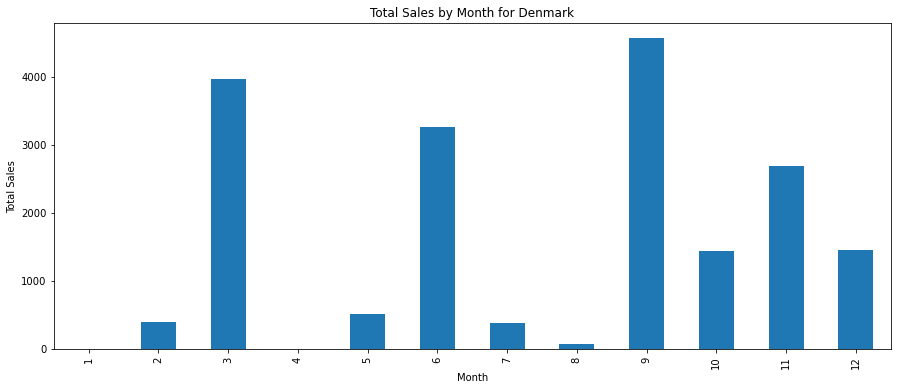

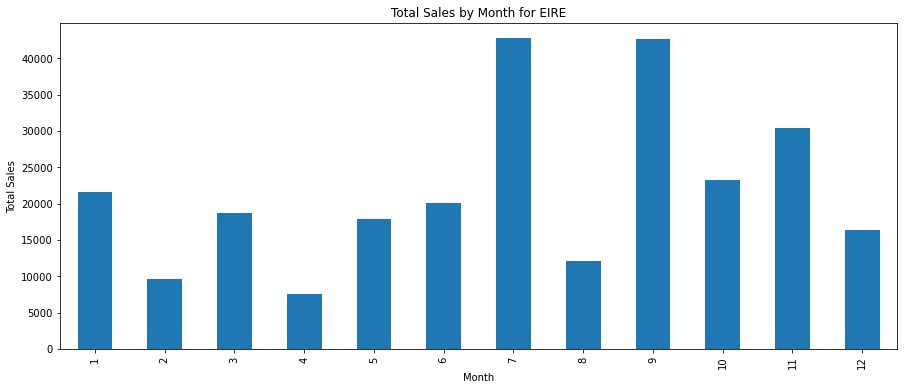

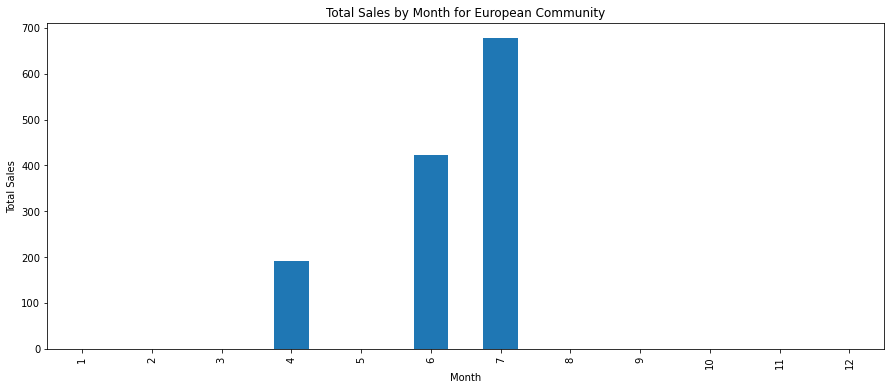

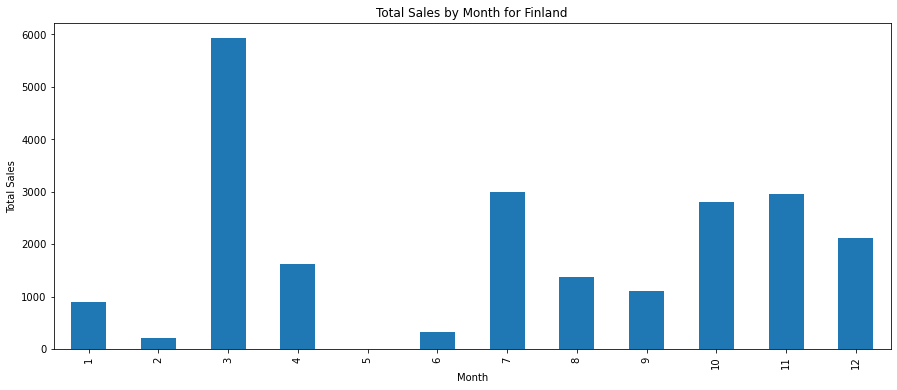

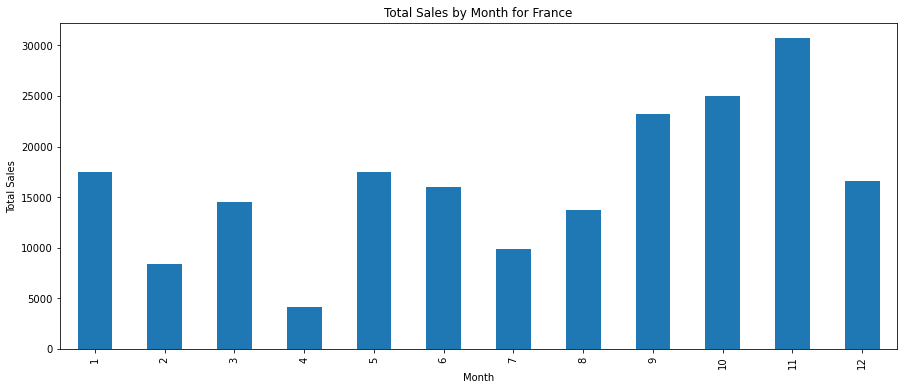

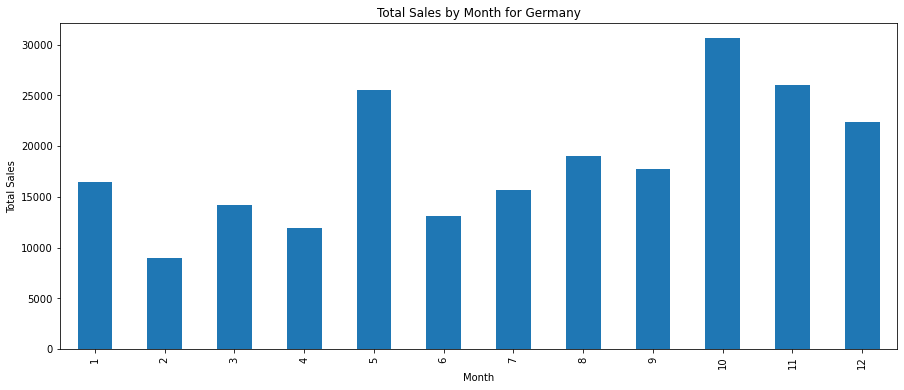

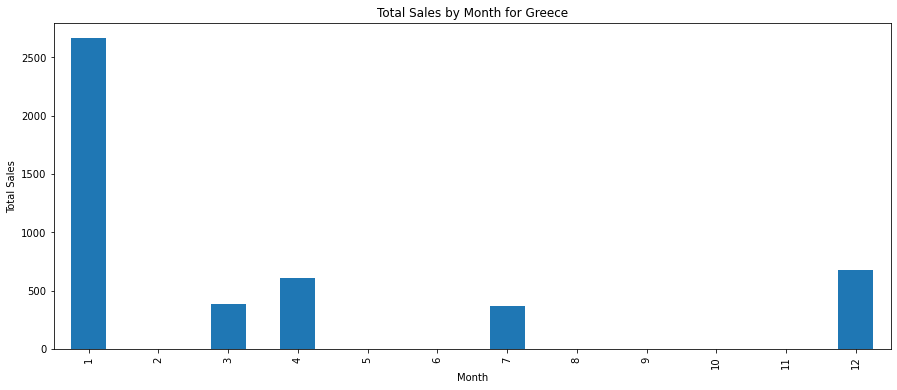

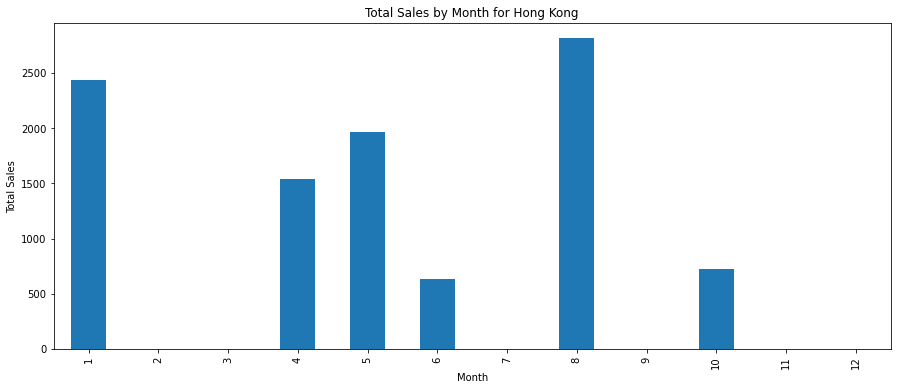

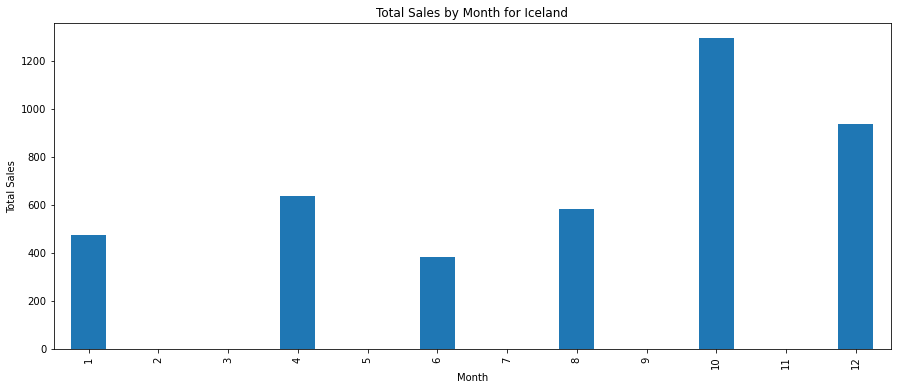

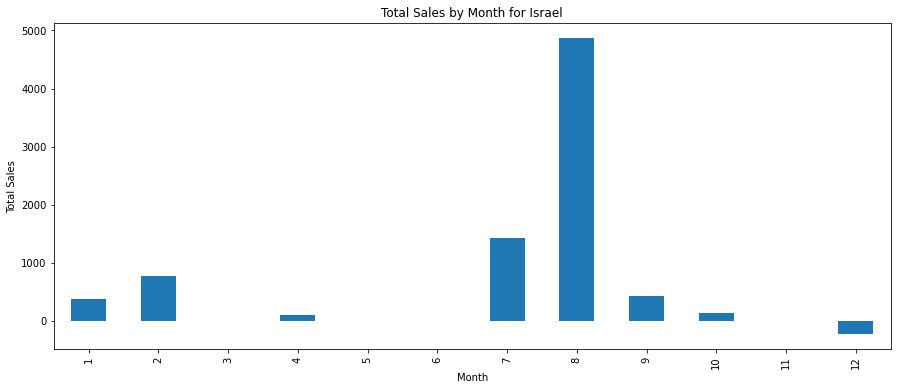

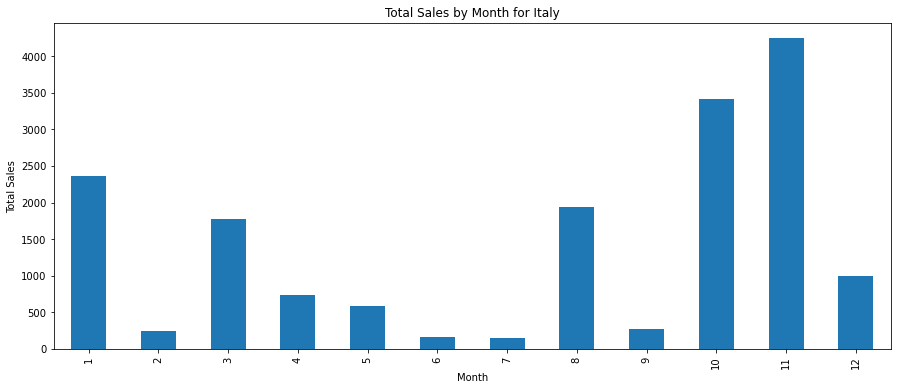

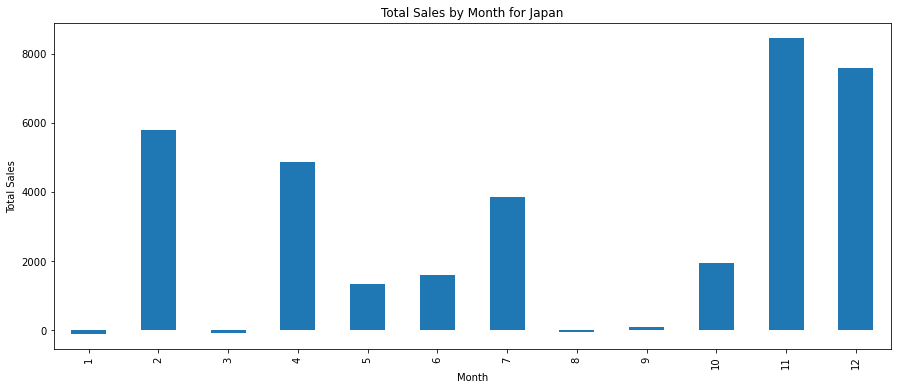

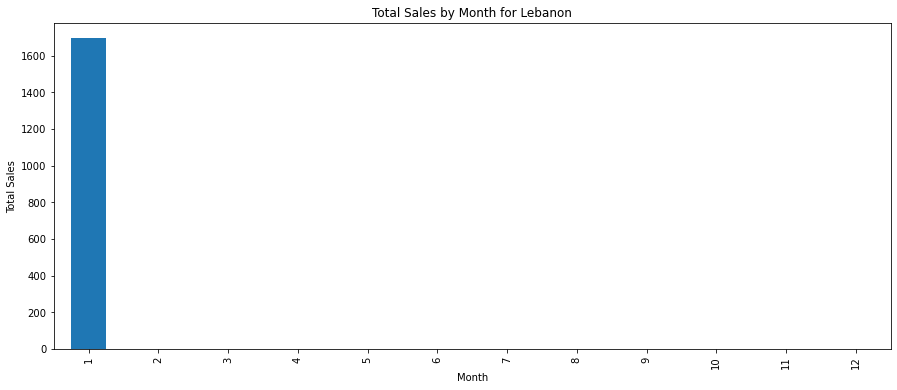

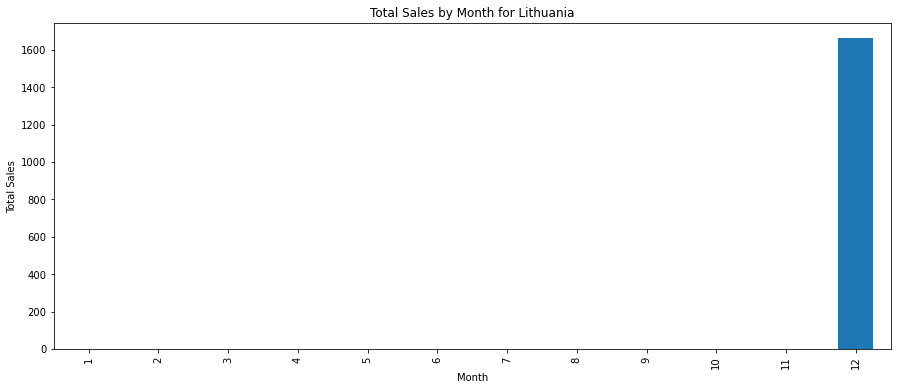

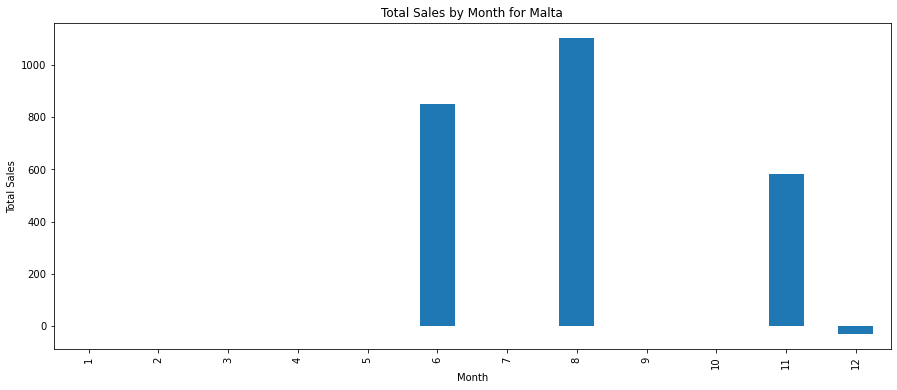

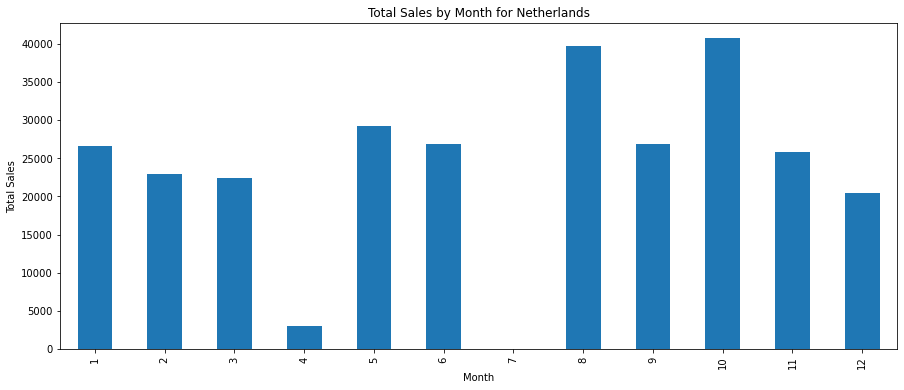

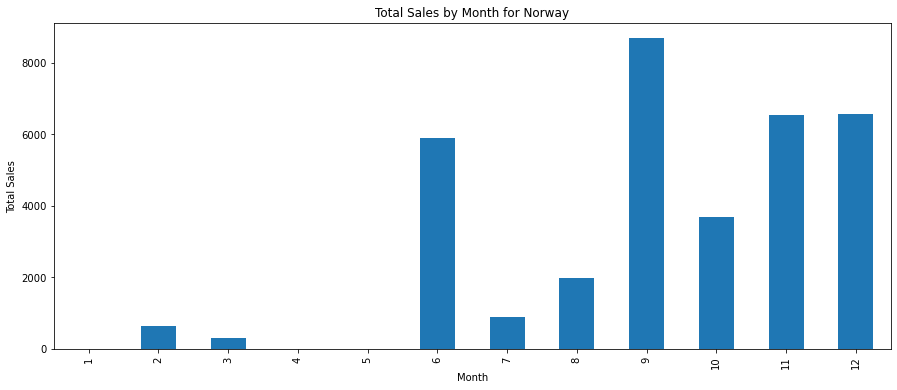

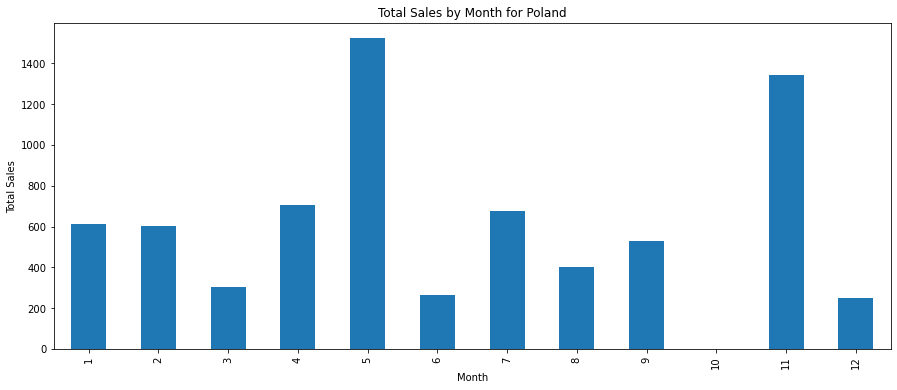

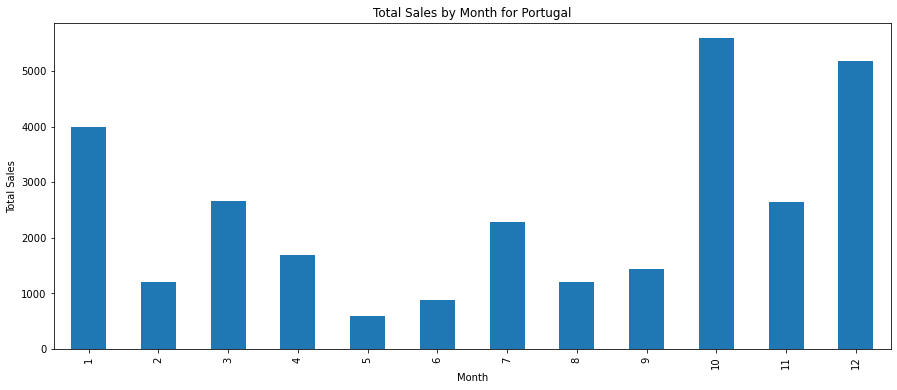

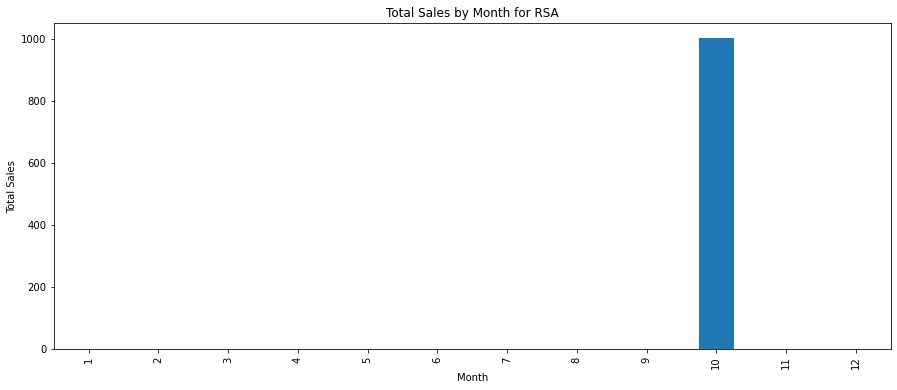

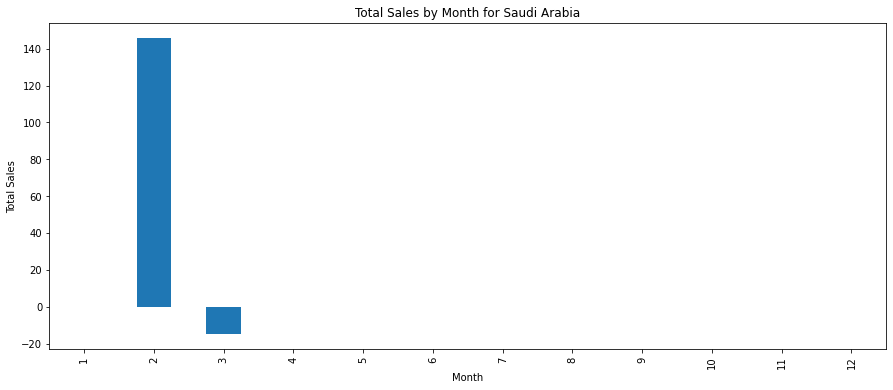

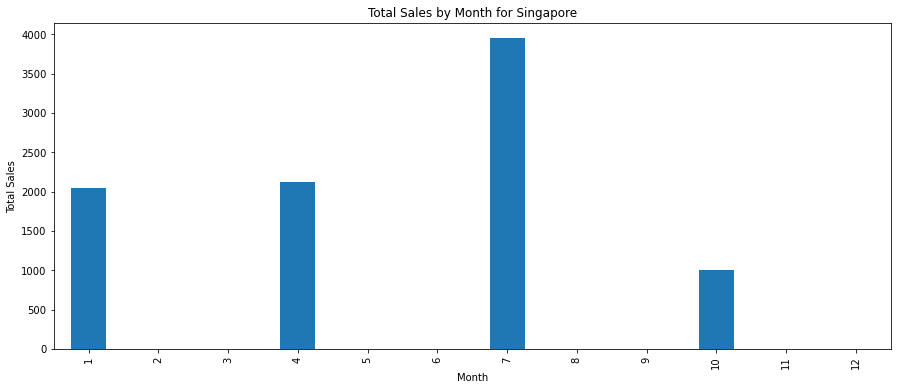

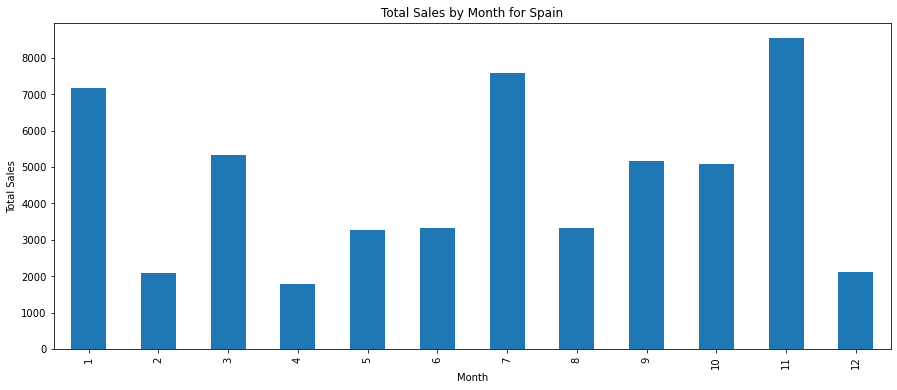

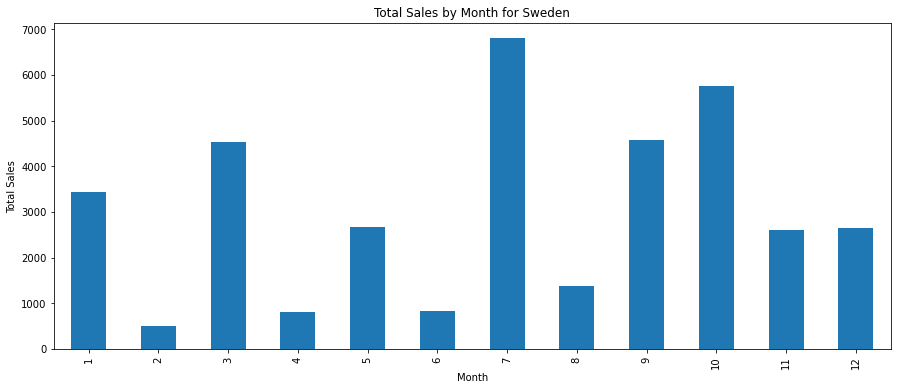

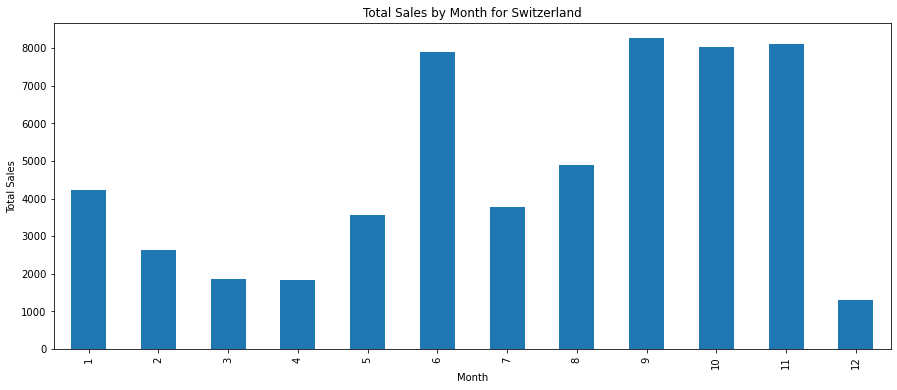

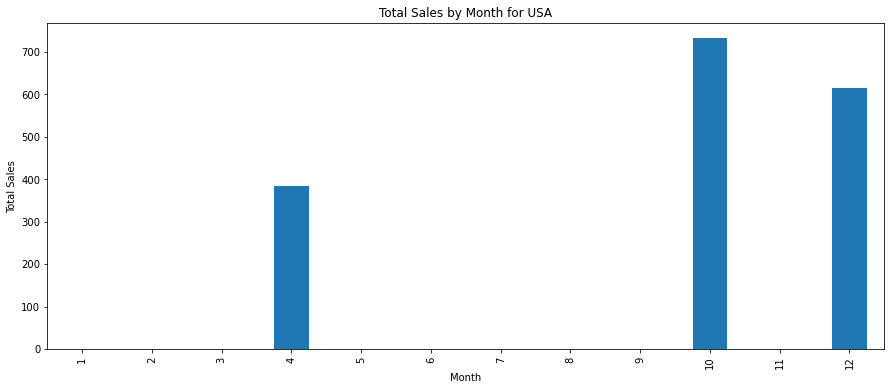

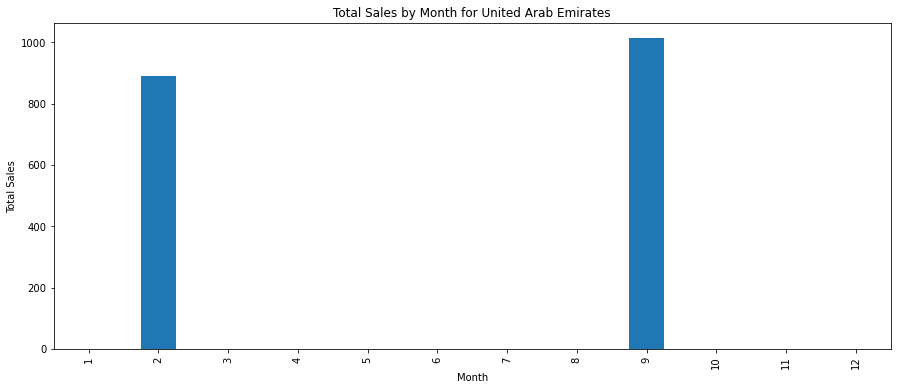

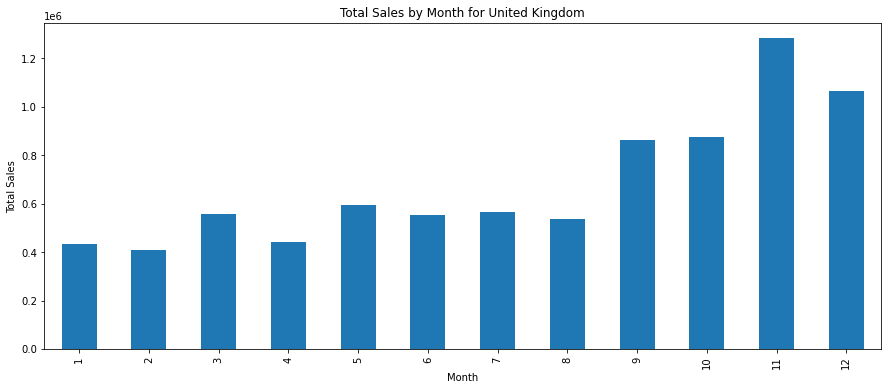

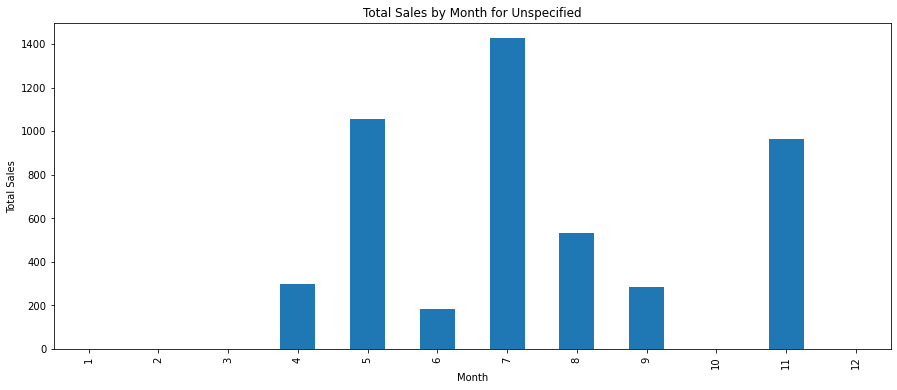

In [90]:
# Создание графиков для каждой страны
for country in sales_by_country_month.index:
    sales_by_country_month.loc[country].plot(kind="bar", figsize=(15, 6))
    plt.title(f"Total Sales by Month for {country}")
    plt.ylabel("Total Sales")
    plt.show()

Обратим внимание на частоту покупок из месяца в месяц в богатых странах и в бедных странах: в богатых мы видим регулярные покупки, а в бедных - 1 - 2 месяца в год.

## 10 стран с самыми маленькими суммами продаж за все время:

In [74]:
# Группировка данных по странам и суммирование продаж
total_sales_by_country = df.groupby("Country")["TotalPrice"].sum()

# Сортировка по сумме продаж и выбор 10 стран с наименьшими продажами
lowest_sales_countries = total_sales_by_country.nsmallest(10)

print(lowest_sales_countries)

Country
Saudi Arabia             131.17
Bahrain                  548.40
Czech Republic           707.72
RSA                     1002.31
Brazil                  1143.60
European Community      1291.75
Lithuania               1661.06
Lebanon                 1693.88
USA                     1730.92
United Arab Emirates    1902.28
Name: TotalPrice, dtype: float64


Выведем топ стран-аутсайдеров по продажам. Сюда попала: Бразилия, Бахрейн, Чешская Республика и т.д.

## Подсчет продаж по ID покупателя:

In [96]:
# Продажи по ID покупателя по месяцам и годам
sales_by_customer_month_year = df.groupby(['CustomerID', df['InvoiceDate'].dt.to_period('M')]).sum()['TotalPrice'].sort_values(ascending=False)

print(sales_by_customer_month_year)

CustomerID  InvoiceDate
17450.0     2011-09        70246.50
18102.0     2011-10        52681.27
            2011-09        49622.18
            2011-06        41959.44
14646.0     2011-10        39995.95
                             ...   
15749.0     2011-04        -1462.50
12755.0     2011-04        -1591.20
15369.0     2011-07        -1592.49
16029.0     2011-05        -3585.84
17448.0     2011-07        -4287.63
Name: TotalPrice, Length: 13675, dtype: float64


Проанализируем объем продаж в разрезе ID покупателей. На основе данных можем сгруппировать айдишки по нескольким группам: высокий уровень дохода, средний и низкий и проработать программу работы с каждой группой в индивидуальном режиме с целью повышения продаж в будущем. Здесь можно отфильтровать продажи по году или по месяцам. По желанию можно исследовать динамику среднего чека на каждого клиента в разрезе месяца, года и выделить когорты.

In [98]:
# Сумма продаж по каждому покупателю за все время
total_sales_by_customer = df.groupby('CustomerID').sum()['TotalPrice'].sort_values(ascending=False)

print(total_sales_by_customer)

CustomerID
14646.0    279489.02
18102.0    256438.49
17450.0    187482.17
14911.0    132572.62
12415.0    123725.45
             ...    
12503.0     -1126.00
17603.0     -1165.30
14213.0     -1192.20
15369.0     -1592.49
17448.0     -4287.63
Name: TotalPrice, Length: 4372, dtype: float64


Выведем топовые ID клиентов по продажам за все время. 

## Cредняя стоимость покупки по месяцам для каждого ID покупателя (средний чек для каждого покупаеля):

In [107]:
# Группировка данных по ID покупателя и месяцу, расчет средней стоимости покупки
avg_price_per_month = df.groupby(['CustomerID', 'Month'])['TotalPrice'].mean().reset_index()

avg_price_per_month = avg_price_per_month.sort_values(by='TotalPrice', ascending=False)

print(avg_price_per_month)

       CustomerID  Month  TotalPrice
7825      15749.0      1     4599.68
6654      15195.0     12     3861.00
1103      12755.0     12     3794.40
1177      12798.0     11     3651.60
1969      13135.0      5     3096.00
...           ...    ...         ...
12415     17809.0      7     -717.23
411       12503.0      1    -1126.00
1102      12755.0      4    -1591.20
7033      15369.0      7    -1592.49
11558     17448.0      7    -4287.63

[13415 rows x 3 columns]


Рассчитаем чек на каждый ID покупателя в разрезе месяца.

## Сумма покупок по каждой рекламной акции:

In [108]:
# Группировка данных по коду рекламной акции и вычисление суммы покупки
total_price_by_stockcode = df.groupby("StockCode")["TotalPrice"].sum()

# Сортировка данных по убыванию суммы покупки
sorted_total_price = total_price_by_stockcode.sort_values(ascending=False)

print(sorted_total_price)

StockCode
DOT             206245.480
22423           164762.190
47566            98302.980
85123A           97894.500
85099B           92356.030
                   ...    
BANK CHARGES     -7175.639
CRUK             -7933.430
B               -11062.060
M               -68674.190
AMAZONFEE      -221520.500
Name: TotalPrice, Length: 4070, dtype: float64


За весь период выявлены наиболее эффективные акции (топ 5) по обороту: DOT, 22423, 47566, 85123A и 85099B и наиболее убыточные: AMAZONFEE, М, В, CRUK и BANK CHARGES. Для точной оценки акций необходимо изучить их механики, ассортименты и офферы.

## Сумма покупок для каждого ID покупателя (LTV):

In [77]:
# 1. Общая средняя стоимость покупки
average_purchase_price = df['TotalPrice'].mean()

# 2. Среднее количество месяцев, в которых покупатели совершают покупки

# Группировка данных по покупателю
grouped_df = df.groupby('CustomerID')

# Функция для расчета разницы в месяцах между минимальной и максимальной датой покупки
def calculate_months(row):
    min_date = row['InvoiceDate'].min()
    max_date = row['InvoiceDate'].max()
    months_diff = (max_date.year - min_date.year) * 12 + max_date.month - min_date.month
    return months_diff

# Применение функции к каждой группе
months_diff = grouped_df.apply(calculate_months)

# Расчет среднего количества месяцев
average_months = months_diff.mean()

# 3. Умножить среднюю стоимость покупки на среднее количество месяцев
result_ltv = average_purchase_price * average_months

print("Средняя стоимость покупки:", average_purchase_price)
print("Среднее количество месяцев, в которые покупатели совершают покупки:", average_months)
print("LTV:", result_ltv)

Средняя стоимость покупки: 17.987794877005495
Среднее количество месяцев, в которые покупатели совершают покупки: 4.360704483074108
LTV: 78.43945776077534


In [106]:
# Группировка данных по ID покупателя, расчет суммы покупок
total_purchase = avg_price_per_month.groupby('CustomerID')['TotalPrice'].sum().reset_index()

# Расчет количества месяцев для каждого покупателя
num_months = avg_price_per_month['CustomerID'].value_counts().reset_index()
num_months.columns = ['CustomerID', 'NumMonths']

# Объединение таблиц и расчет общей суммы покупок
total_purchase = pd.merge(total_purchase, num_months, on='CustomerID')
total_purchase['TotalPurchase'] = total_purchase['TotalPrice'] * total_purchase['NumMonths']

total_purchase = total_purchase.sort_values(by='TotalPurchase', ascending=False)

print(total_purchase)

      CustomerID   TotalPrice  NumMonths  TotalPurchase
4125     17949.0  8079.918502         12   96959.022026
4233     18102.0  7874.808499         11   86622.893489
3758     17450.0  5472.505630         12   65670.067560
2945     16333.0  6856.399860          9   61707.598737
2537     15769.0  4444.186561         12   53330.238732
...          ...          ...        ...            ...
2104     15197.0  -291.194657          4   -1164.778627
4063     17867.0  -289.402570          5   -1447.012852
2236     15369.0 -1592.490000          1   -1592.490000
3870     17603.0 -1023.951364          4   -4095.805455
3756     17448.0 -4287.630000          1   -4287.630000

[4372 rows x 4 columns]


Мы рассчитали LTV. Но, к сожалению, мы не можем точно сказать, в норме данный показатель или нет, т.к. мы не владеем данными по затратам на привлечение клиентов. Как правило, нормальный показатель должен быть в три раза выше затрат на привлечение клиента.

В рамках дипломной работы были проанализированы маркетинговые и финансовые KPI: средний чек, объем продаж в разрезе клиентов, регионов, проведен анализ эффективности акций, выведен показатель LTV. У имеющегося датасета по существуют ограничения по времени: неполный 2010 год (имеются данные только на декабрь), полный 2011 год, а также сезонная специфика бизнеса не позволили спрогнозировать объем продаж на будущий период времени. В процессе подготовки данных были отформатированы даты. В базе существует большое количество пропущенных значений, что тоже влияет на снижение качества анализа данных. Также в ходе работы был проведен расчет LTV на основе данных по среднему чеку и среднему количеству месяцев сотрудничества с клиентом. К сожалению, невозможно рассчитать более точный показатель LTV, т.к. датасет не содержит информацию по затратам на маркетинговые активности, также как информацию об основных источниках конверсий. В рамках работы были выведены топ-стран и топ-клиентов по обороту. Полученные финансовые и маркетинговые метрики помогут стейкхолдерам скорректировать план работ на будущий период времени с целью достижения оптимальных показателей в работе: разработки стратегии и тактики по акциям, стимулирующим мероприятиям по регионам, а также индивидуальной работе с клиентами.